# ModelingToolkit 

# 1 Вводные примеры


In [ ]:
using ModelingToolkit

## 1.1 Простая система первого порядка

Рассмотрим простое дифференциальное уравнение с одной переменной:

$$\frac{dx}{dt} = (1-x)$$
$$ x(0)=0$$

На MTK это уравнение может быть представлено в следующем виде: 

In [300]:
@variables t x(t) = 0
@named FirstOrder = ODESystem(Differential(t)(x) ~ (1 - x))

Model FirstOrder with 1 equations
States (1):
  x(t) [defaults to 0]
Parameters (0):

или в развернутой записи

In [301]:
@variables t                 # независимая переменная (время)
@variables x(t) = 0          # зависимая переменная, инициализированная нулем
der = Differential(t)        # оператор дифференцирования
equation = der(x) ~ (1 - x)  # дифур в символьной записи, (~) - знак равенства

@named FirstOrder = ODESystem(equation)

Model FirstOrder with 1 equations
States (1):
  x(t) [defaults to 0]
Parameters (0):

После конструирования ОДУ, его можно решить с помощью DifferentialEquations, задав предварительно интервал расчета от 0 до 10 сек в конструкторе задачи `ODEProblem`

In [ ]:
using DifferentialEquations, Plots

In [303]:
prob = ODEProblem(FirstOrder, [], [0, 10])
sol = solve(prob);

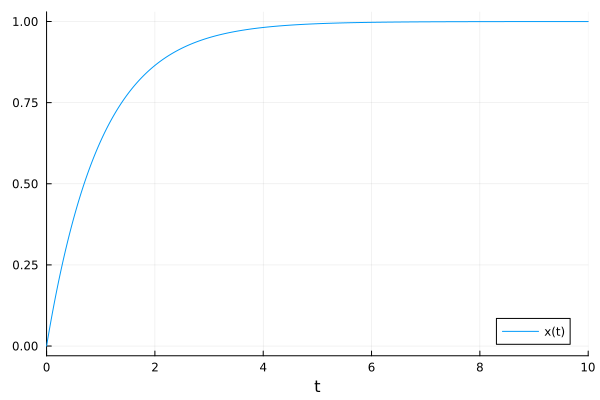

In [304]:
plot(sol)

Вторым аргументом `ODEProblem` можно изменить начальные условия, не создавая заново ОДУ

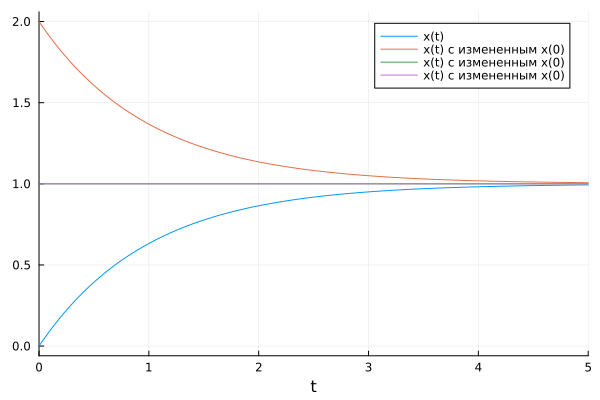

In [307]:
prob = ODEProblem(FirstOrder, [x=>1], [0, 5])
sol = solve(prob)
plot!(sol, label="x(t) с измененным x(0)")

## 1.2. Моделирование физических систем

Перейдем к моделям физических систем. Следующее уравнение определяет изменение температуры согласно [закону](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%9D%D1%8C%D1%8E%D1%82%D0%BE%D0%BD%D0%B0_%E2%80%94_%D0%A0%D0%B8%D1%85%D0%BC%D0%B0%D0%BD%D0%B0) охлаждения Ньютона 

$$ c_p m \frac{dT}{dt}=A h (T_{\infty}-T)$$

In [318]:
@variables t [description = "Время"]
@variables T(t) = 90 [description = "Температура"]

@parameters T∞ = 25 [description = "Температура окружающей среды"]
@parameters h = 0.7 [description = "Коэффициент конвективной теплоотдачи"]
@parameters A = 1.0 [description = "Площадь поверхности"]
@parameters m = 0.1 [description = "Масса"]
@parameters cₚ = 1.2 [description = "Удельная теплоемкость"]

der = Differential(t)
equation = der(T) ~ h * A * (T∞ - T) / (m * cₚ)

@named NewtonCooling = ODESystem(equation, t)

Model NewtonCooling with 1 equations
States (1):
  T(t) [defaults to 90]: Температура
Parameters (5):
  cₚ [defaults to 1.2]: Удельная теплоемкость
  T∞ [defaults to 25]: Температура окружающей среды
  h [defaults to 0.7]: Коэффициент конвективной теплоотдачи
  A [defaults to 1.0]: Площадь поверхности
  m [defaults to 0.1]: Масса

Параметры, декларируемые с помощью `@parameters` это переменные, значения которых известны заранее (до симуляции), в отличие от переменных, декларируемых с помощью `@variables`, значения которых вычисляются по ходу решения уравнения.

К переменным можно присоединить строку описания с помощью ключевого слова `description`.

МТК не всегда может угадать какая из переменных независимая, поэтому следует явно ее указать вторым аргументом `ODESystem`

In [313]:
getdescription(A)

"Площадь поверхности"

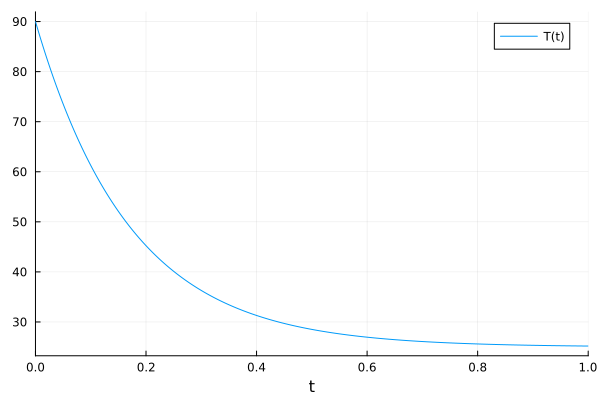

In [314]:
prob = ODEProblem(NewtonCooling, [], [0.0, 1.0])
sol = solve(prob)
plot(sol)

### Физические единицы

Присоединение к описанию переменных единиц измерений с помощью ключевого слова `unit` делает модель не только более ясной, но и обеспечивает правильность составления уравнений путем автоматического контроля размерностей правой и левой частей. Для этого используем пакет [Unitful.jl](https://painterqubits.github.io/Unitful.jl/stable/) 

In [ ]:
using Unitful

In [320]:
@variables t [description = "Время"; unit = u"s"]
@variables T(t) = 90 [description = "Температура"; unit=u"K"]

@parameters T∞ = 25 [description = "Температура окружающей среды"; unit=u"K"]
@parameters h = 0.7 [description = "Коэффициент конвективной теплоотдачи"; unit=u"W/(m^2*K)"]
@parameters A = 1.0 [description = "Площадь поверхности"; unit=u"m^2"]
@parameters m = 0.1 [description = "Масса"; unit=u"kg"]
@parameters cₚ = 1.2 [description = "Удельная теплоемкость"; unit=u"J/(K*kg)"]

der = Differential(t)
equation = der(T) ~ h * A * (T∞ - T) / (m * cₚ)

@named NewtonCooling = ODESystem(equation, t)

Model NewtonCooling with 1 equations
States (1):
  T(t) [defaults to 90]: Температура
Parameters (5):
  cₚ [defaults to 1.2]: Удельная теплоемкость
  T∞ [defaults to 25]: Температура окружающей среды
  h [defaults to 0.7]: Коэффициент конвективной теплоотдачи
  A [defaults to 1.0]: Площадь поверхности
  m [defaults to 0.1]: Масса

In [321]:
ModelingToolkit.get_unit(h)

W K^-1 m^-2

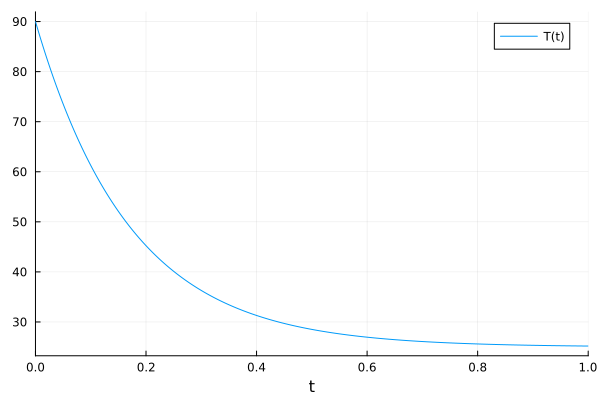

In [322]:
prob = ODEProblem(NewtonCooling, [], [0.0, 1.0])
sol = solve(prob)
plot(sol)

Четвертым аргументом `ODEProblem` можно изменить параметры модели, не создавая заново ОДУ

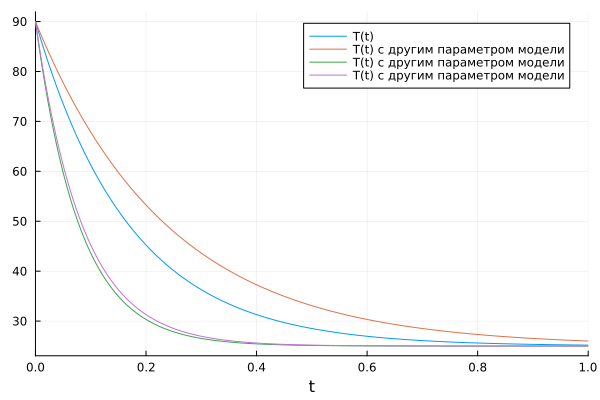

In [326]:
prob = ODEProblem(NewtonCooling, [], [0.0, 1.0], [h=>0.7, A=>2])
sol = solve(prob)
plot!(sol, label="T(t) с другим параметром модели")

## 1.3 Электрическая цепь

Рассмотрим электрическую цепь с источником постоянного напряжения $E$.

![Image](http://ets.ifmo.ru/osipov/os1/3_2.files/image031.jpg)

Составим систему уравнений цепи по законам Кирхгофа:

\begin{equation*}
 \begin{cases}
   -i_1 + i_2 +i_L = 0 
   \\
   r_1 i_1 + r_2 i_2 =E
   \\
   u_L=L\frac{di_L}{dt}=r_2 i_2
 \end{cases}
\end{equation*}

Пусть значения параметров $r_1=r_2=0.2$, $L=0.01$, $E=10$, а начальные значения переменных $i_i(0)=i_2(0)=i_L(0)=0$ 

In [371]:
@variables t [unit = u"s"]
@variables i₁(t) = 0 [unit=u"A"]
@variables i₂(t) = 0 [unit=u"A"]
@variables iₗ(t) = 0 [unit=u"A"]

@parameters E = 10.0 [unit=u"V"]
@parameters r₁ = 0.2 [unit=u"Ω"]
@parameters r₂ = 0.2 [unit=u"Ω"]
@parameters L = 0.01 [unit=u"H"]

der = Differential(t)
eqs = [
    0 ~ i₂ - i₁ + iₗ
    0 ~ E - r₁ * i₁ - r₂ * i₂
    der(iₗ) ~ r₂ * i₂ / L
    ]

@named Circuit = ODESystem(eqs, t)

Model Circuit with 3 equations
States (3):
  iₗ(t) [defaults to 0]
  i₂(t) [defaults to 0]
  i₁(t) [defaults to 0]
Parameters (4):
  r₁ [defaults to 0.2]
  E [defaults to 10.0]
  r₂ [defaults to 0.2]
  L [defaults to 0.01]

In [372]:
prob = ODEProblem(Circuit, [], [0.0, 1])
sol = solve(prob)
plot(sol)

Модель описывается системой уравнений, которые оформляются в массив уравнений

По умолчанию перед симуляцией выполняется процедура инициализации переменных, поэтому стартовые значения токов через резисторы отличны от заданных нулевых значений. Отключить инициализацию можно, передав функции `solve`  аргумент `initializealg=NoInit()`

Для построения графика заданной переменной достаточно передать аргументу `idxs` ее имя

In [373]:
plot(sol, idxs=r₁)

или массив имен

In [374]:
plot(sol, idxs=[i₁, i₂])

или выражение

In [375]:
plot(sol, idxs=r₁*i₁, label="u₁")

### Источник переменного напряжения

Пусть напряжение источника синусоидальное

$$e = E_m sin(2\pi f t)$$

где $E_m$ - амплитуда, $f$ - частота

In [376]:
@variables t [unit = u"s"]
@variables i₁(t) = 0 [unit=u"A"]
@variables i₂(t) = 0 [unit=u"A"]
@variables iₗ(t) = 0 [unit=u"A"]
@variables e(t) = 0 [unit=u"V"]

@parameters Em = 10 [unit=u"V"]
@parameters r₁ = 0.2 [unit=u"Ω"]
@parameters r₂ = 0.2 [unit=u"Ω"]
@parameters L = 0.01 [unit=u"H"]
@parameters f = 50 [unit=u"Hz"]

@constants п = π  # константа
ω = 2п*f          # промежуточное выражение

der = Differential(t)
eqs = [
    0 ~ e - Em * sin(ω*t)
    0 ~ i₂ - i₁ + iₗ
    0 ~ e - r₁ * i₁ - r₂ * i₂
    der(iₗ) ~ r₂ * i₂ / L
    ]

@named Circuit = ODESystem(eqs, t)

Model Circuit with 4 equations
States (4):
  iₗ(t) [defaults to 0]
  e(t) [defaults to 0]
  i₂(t) [defaults to 0]
  i₁(t) [defaults to 0]
Parameters (5):
  f [defaults to 50]
  Em [defaults to 10]
  r₁ [defaults to 0.2]
  r₂ [defaults to 0.2]
  L [defaults to 0.01]

Обратим внимание на промежуточное выражение. Можно было написать уравнение `0 ~ e - Em * sin(2π*f*t)`, но вместо этого мы вводим промежуточную переменную `ω`. Это часто улучшает читаемость.

Физические и др. константы удобно декларировать с помощью `@constants`, что также улучшает читаемость уравнений модели: вместо $0 = Em \sin(6.2832ft) +e(t)$ видим $0 = Em \sin(2pftп) +e(t)$

In [377]:
prob = ODEProblem(Circuit, [], [0.0, 0.2])
sol = solve(prob)
plot(sol)

## 1.4 Моделирование биологических систем
Создадим на МТК [модель Лотки-Вольтерры](https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%9B%D0%BE%D1%82%D0%BA%D0%B8_%E2%80%94_%D0%92%D0%BE%D0%BB%D1%8C%D1%82%D0%B5%D1%80%D1%80%D1%8B), описывающую изменение численности конкурирующих видов животных

$$\frac{dx}{dt}=\alpha x -\beta yx$$
$$\frac{dy}{dt}=-\gamma y +\delta xy $$


где $x$, $y$ - численность популяции жертв и хищников, $\alpha$, $\delta$ - их постоянные коэффициенты рождаемости, $\beta$, $\gamma$ - их постоянные коэффициенты смертности 

In [ ]:
# Cамостоятельно

## 1.5 Получение информации о модели

In [369]:
equations(Circuit)

4-element Vector{Equation}:
 Differential(t)(iₗ(t)) ~ (r₂*i₂(t)) / L
 0 ~ e(t) - Em*sin(2f*t*п)
 0 ~ i₂(t) + iₗ(t) - i₁(t)
 0 ~ e(t) - r₁*i₁(t) - r₂*i₂(t)

In [351]:
parameters(Circuit)

5-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 f
 Em
 r₁
 r₂
 L

In [352]:
states(Circuit)

4-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 iₗ(t)
 e(t)
 i₂(t)
 i₁(t)

In [354]:
ModelingToolkit.defaults(Circuit)

Dict{Any, Any} with 9 entries:
  i₂(t) => 0
  f     => 50
  i₁(t) => 0
  r₁    => 0.2
  L     => 0.01
  e(t)  => 0
  Em    => 10
  r₂    => 0.2
  iₗ(t) => 0

In [355]:
prob.f.mass_matrix

4×4 Matrix{Float64}:
 1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0